In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.getcwd()

'/Users/darsini/Downloads'

In [3]:
df = pd.read_excel('/Users/darsini/Downloads/churn_data.xlsx')

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.shape

(5630, 20)

### Data Cleaning:

In [12]:
# Checking data types
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [13]:
# Checking for duplicates
df.duplicated().sum()

0

In [14]:
# Checking for missing values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [15]:
# Handling Missing Values with Imputation

# Using the median to impute missing values

numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Checking if there are any missing values left
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Exploratory Data Analysis:

#### 1. Summary Statistics for numerical features to understand their central tendency and dispersion.

In [18]:
# Summary statistics for numerical features
summary_statistics = df.describe()

# Frequency distribution of categorical features
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 
                       'Gender', 'PreferedOrderCat', 'MaritalStatus']
category_distribution = df[categorical_columns].apply(lambda x: x.value_counts())

summary_statistics

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


- The average tenure of customers in the dataset is approximately 10 months, with a range from 0 to 61 months.
- Customers spend an average of 2.93 hours on the app, with some spending up to 5 hours.
- The number of devices registered ranges from 1 to 6, with an average of about 3.69 devices per customer.
- Satisfaction scores range from 1 to 5, with an average score of 3.07.
- The number of addresses listed by customers ranges from 1 to 22, indicating variability in the dataset regarding this feature.

#### 2. Visualizations

Visualizing distributions of key features and exploring relationships between some features and churn

- The distribution of Tenure, HourSpendOnApp, and CashbackAmount.
- The relationship between Churn and some key features like SatisfactionScore, OrderCount, and NumberOfDeviceRegistered.

These visualizations can help in understanding how different features behave across our dataset and identify patterns related to churn. 

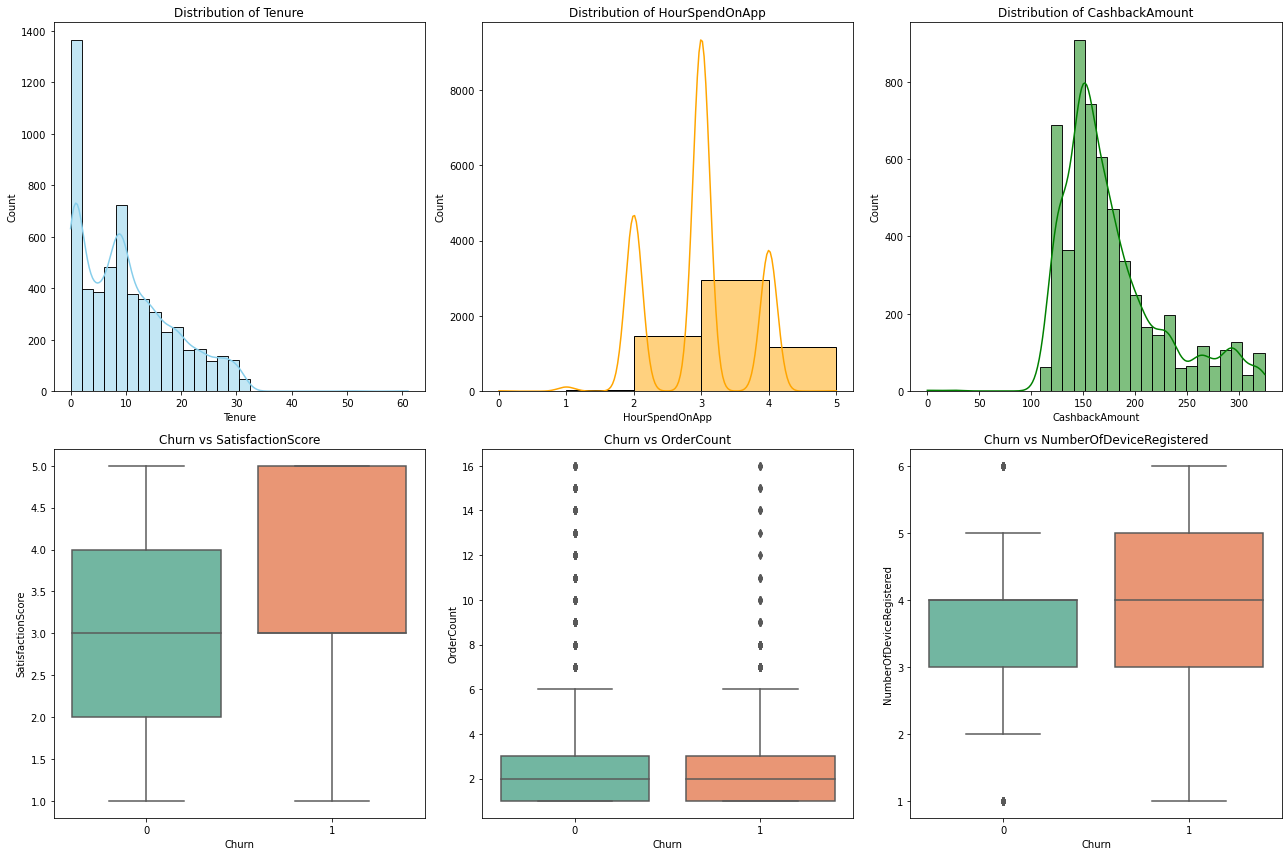

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histograms for numerical distributions
sns.histplot(df['Tenure'], bins=30, ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of Tenure')

sns.histplot(df['HourSpendOnApp'], bins=5, ax=axes[0, 1], kde=True, color='orange')
axes[0, 1].set_title('Distribution of HourSpendOnApp')

sns.histplot(df['CashbackAmount'], bins=30, ax=axes[0, 2], kde=True, color='green')
axes[0, 2].set_title('Distribution of CashbackAmount')

# Box plots for churn relationship
sns.boxplot(x='Churn', y='SatisfactionScore', data=df, ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title('Churn vs SatisfactionScore')

sns.boxplot(x='Churn', y='OrderCount', data=df, ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title('Churn vs OrderCount')

sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df, ax=axes[1, 2], palette="Set2")
axes[1, 2].set_title('Churn vs NumberOfDeviceRegistered')

plt.tight_layout()
plt.show()

Distribution Visualizations:

- Tenure: The distribution of tenure shows a significant number of customers with a short tenure, indicating a high turnover among newer customers.
- HourSpendOnApp: Most customers spend between 2 to 3 hours on the app, with the distribution slightly skewed towards higher values.
- CashbackAmount: The cashback amount shows a wide range, with a peak around the lower end, suggesting that most customers receive a lower amount of cashback.

Churn Relationship Visualizations:
- SatisfactionScore: The box plot indicates that churned customers tend to have a lower satisfaction score, suggesting dissatisfaction might lead to churn.
- OrderCount: Churned and non-churned customers show some overlap in order counts, but lower order counts have a slightly higher concentration of churned customers.
- NumberOfDeviceRegistered: There's not a stark difference in the number of devices registered between churned and non-churned customers, indicating this might not be a strong predictor of churn on its own.

#### 3. Correlation Analysis:

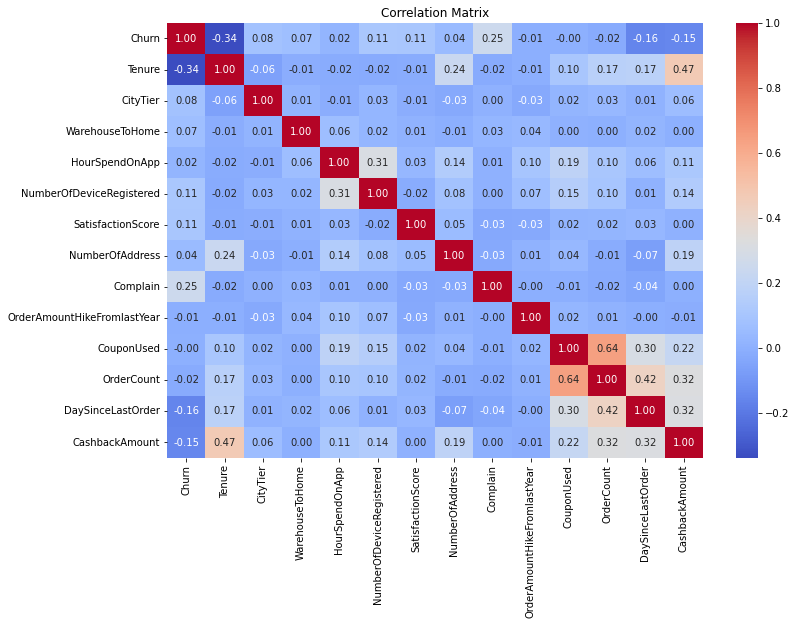

In [29]:
# Correlation matrix
correlation_matrix = df.iloc[:,1:].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Data Processing:

#### 1. Correlation Analysis:

Identifying relationships between the predictor variables, to find any potential multicollinearity problem
Focusing on the predictors helps in getting a clear understanding of the relationships among them, which can be useful when considering feature selection.

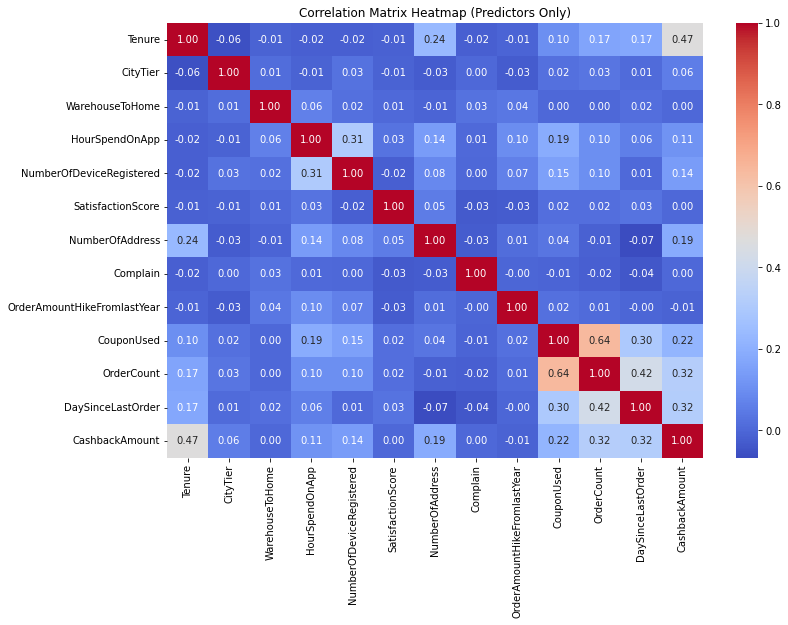

In [32]:
# Drop the target variable 'Personal Loan' from the correlation matrix
predictors_correlation = correlation_matrix.drop('Churn', axis=0).drop('Churn', axis=1)


# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(predictors_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap (Predictors Only)")
plt.show()

From the correlation matrix among predictors, we observe that 'Ordercount' and 'Coupon used' have have a moderate positive correlation, implying that as customers use more coupons, their order counts tend to increase.

#### 2. Dealing with categorical variables

In [33]:
# Perform one-hot encoding for categorical variables
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the shape of the data to see the increase in columns due to one-hot encoding
data_encoded.shape

(5630, 31)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Feature selection
# Selecting a mix of numerical and encoded categorical features for simplicity
features = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 
            'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Credit Card',
            'Gender_Male', 'PreferedOrderCat_Mobile', 'MaritalStatus_Single']
target = 'Churn'

X = data_encoded[features]
y = data_encoded[target]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    
    return accuracy, precision, recall, f1, auc_roc

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "SVM": SVC(probability=True, random_state=0)
}

# Training and evaluating models
results = {}
for name, model in models.items():
    results[name] = train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']).T
results_df

,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.884547,0.766990,0.427027,0.548611,0.848298
Decision Tree,0.969805,0.921788,0.891892,0.906593,0.938507
Random Forest,0.967140,0.962500,0.832432,0.892754,0.981308
Gradient Boosting,0.899645,0.768657,0.556757,0.645768,0.901898
SVM,0.892540,0.880952,0.400000,0.550186,0.880524


/Users/darsini/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/darsini/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/darsini/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be rem

StopIteration: 

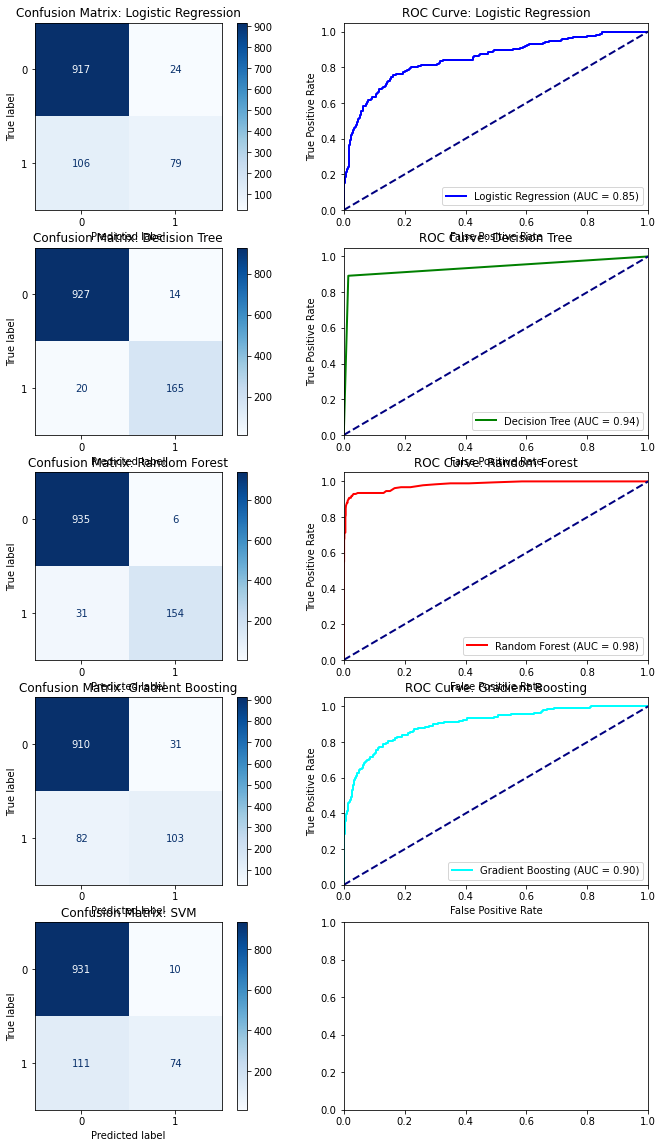

In [43]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_confusion_matrix, auc
import matplotlib.pyplot as plt

models1 = {name: model for name, model in models.items() if name != "Support Vector Machine"}

# Setting up the figure for ROC curves
fig, axs = plt.subplots(len(models1.items()), 2, figsize=(12, 20))

# Resetting colors for ROC curves
colors = iter(['blue', 'green', 'red', 'cyan'])

for i, (name, model) in enumerate(models1.items()):
    # Confusion Matrix
    plot_confusion_matrix(model, X_test_scaled, y_test, ax=axs[i, 0], cmap='Blues')
    axs[i, 0].set_title(f'Confusion Matrix: {name}')
    
    # ROC Curve and AUC
    y_scores = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    color = next(colors)
    
    # Plotting ROC Curve
    axs[i, 1].plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    axs[i, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i, 1].set_xlim([0.0, 1.0])
    axs[i, 1].set_ylim([0.0, 1.05])
    axs[i, 1].set_xlabel('False Positive Rate')
    axs[i, 1].set_ylabel('True Positive Rate')
    axs[i, 1].set_title(f'ROC Curve: {name}')
    axs[i, 1].legend(loc="lower right")

# Adjusting layout
plt.tight_layout()
plt.show()

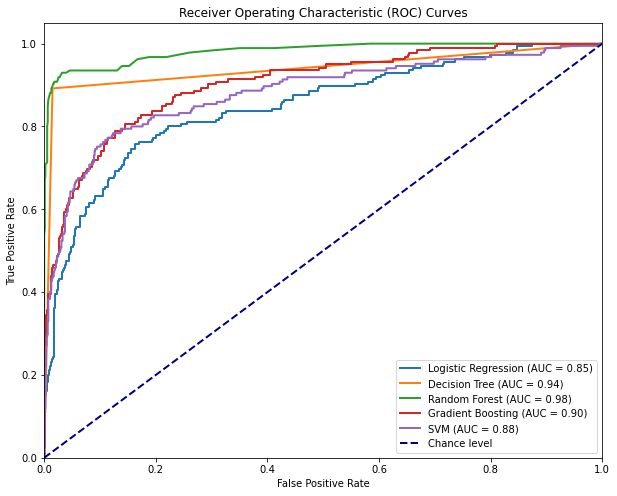

In [44]:
# Setting up the figure for ROC curves
plt.figure(figsize=(10, 8))

for name, model in models1.items():
    # Calculating ROC Curve and AUC
    y_scores = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plotting ROC Curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for a random model (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance level')

# Finishing touches on the ROC curve plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

- Based on these metrics, the Random Forest classifier shows the best overall performance, achieving the highest accuracy and precision, along with a strong F1 score. It signifies a balanced model in terms of both precision (minimizing false positives) and recall (minimizing false negatives).

- The Decision Tree model also shows high accuracy and an excellent balance between precision and recall, evidenced by its F1 score, which is slightly higher than that of the Random Forest. This might suggest a good model fit, though Decision Trees can sometimes overfit to the training data.

- Given these comprehensive evaluations—including accuracy, precision, recall, F1 score, confusion matrices, and ROC curves—the recommendation remains unchanged. The Random Forest classifier is recommended as the most effective model for predicting customer churn, offering robust performance across all major evaluation metrics.